In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv('C:\\Users\\Abdullah\\OneDrive\\Documents\\Cellula Internship\\Fourth task\\final_internship_data.csv')

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358361,-1.265712,0.696740,-1.265755,0.696675,1.683428,13.510834,15.684206,6.268650,3.042008,2011.739132,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916617,0.206941,0.140909,0.205903,0.128997,1.307395,6.511571,8.681066,3.437815,1.949240,1.860889,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [4]:
data.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


Preprocessing

In [5]:
data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")

categorical_cols = data.select_dtypes(include=["object"]).columns.to_list()
categorical_cols.remove("user_id")
categorical_cols.remove("user_name")
categorical_cols.remove("driver_name")
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.str.strip())

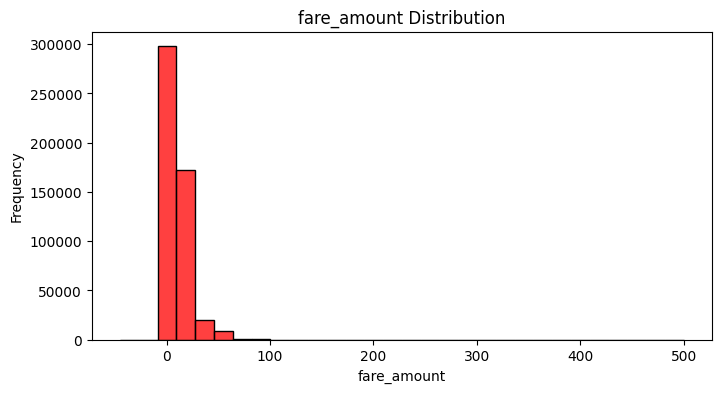

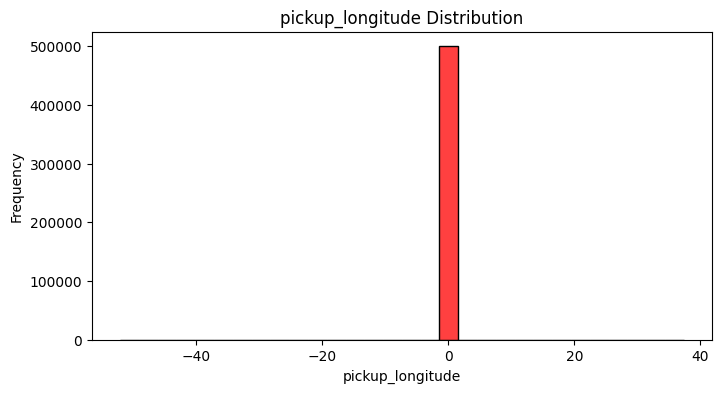

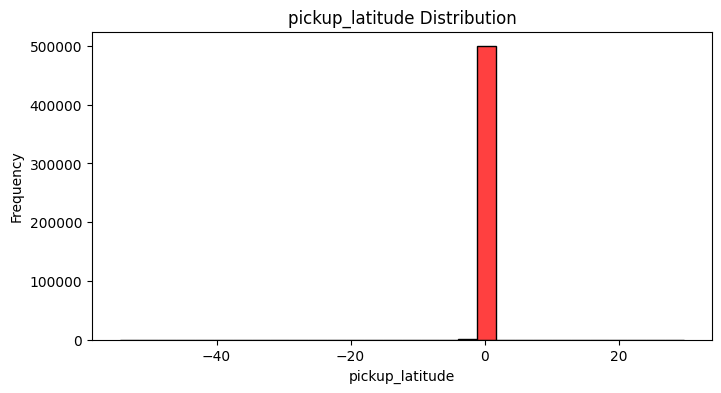

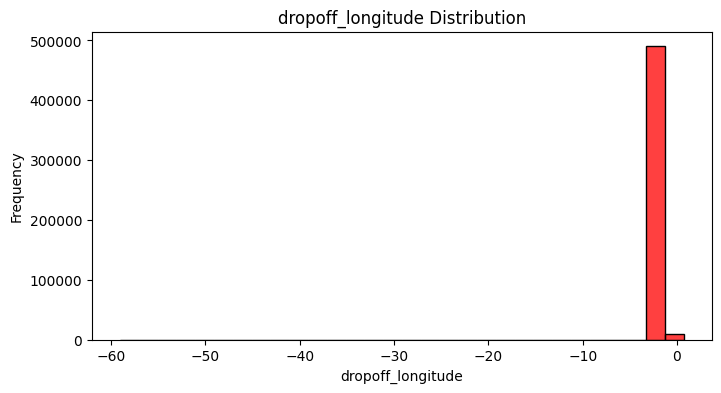

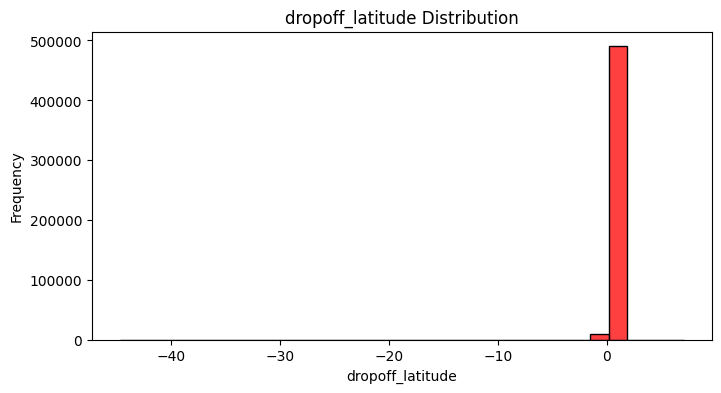

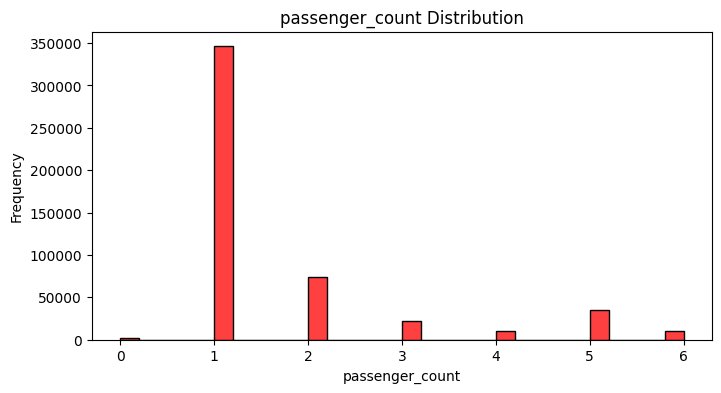

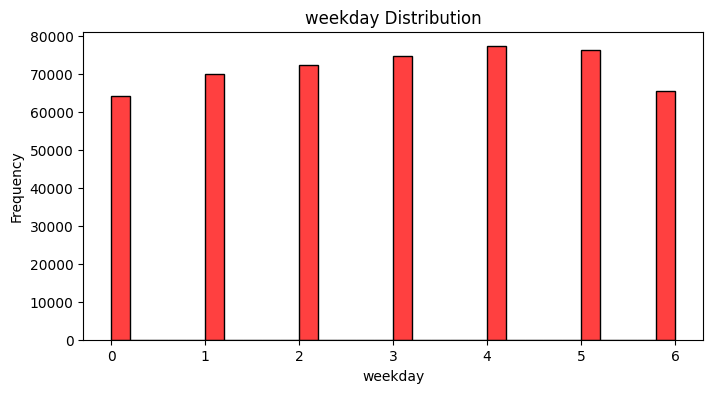

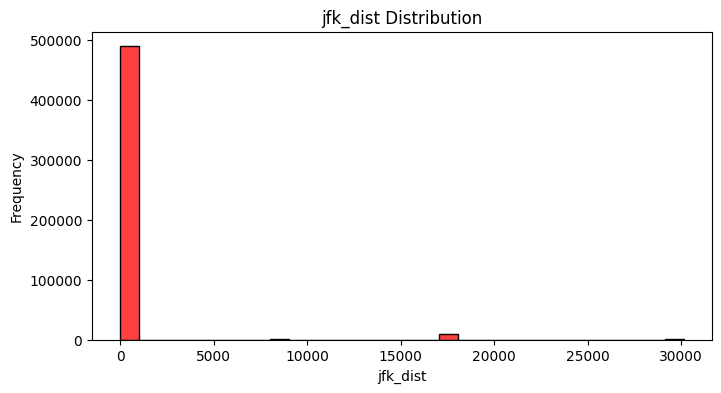

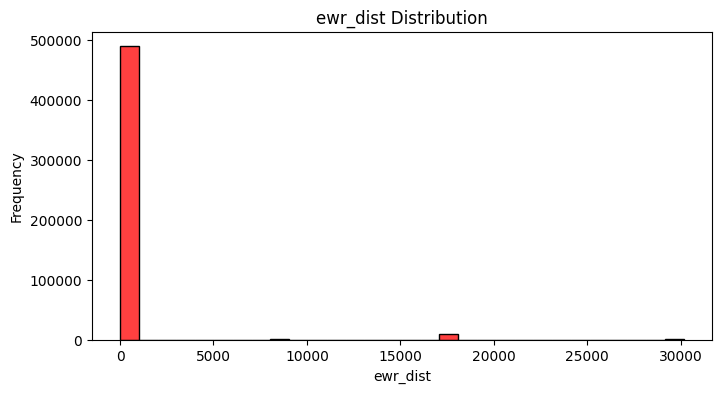

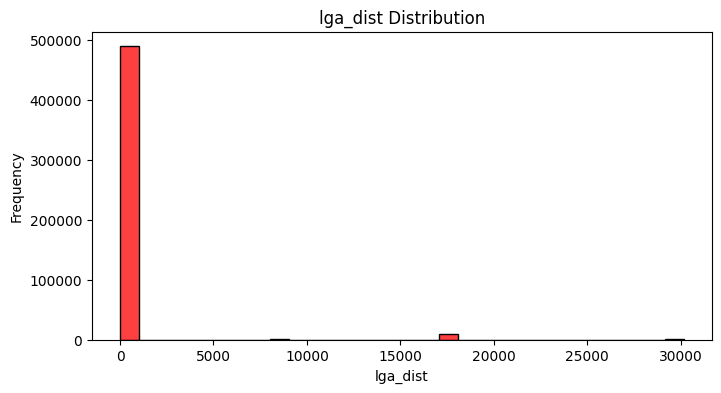

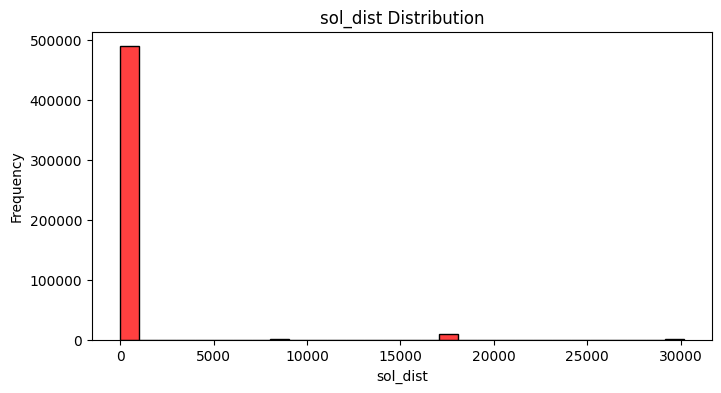

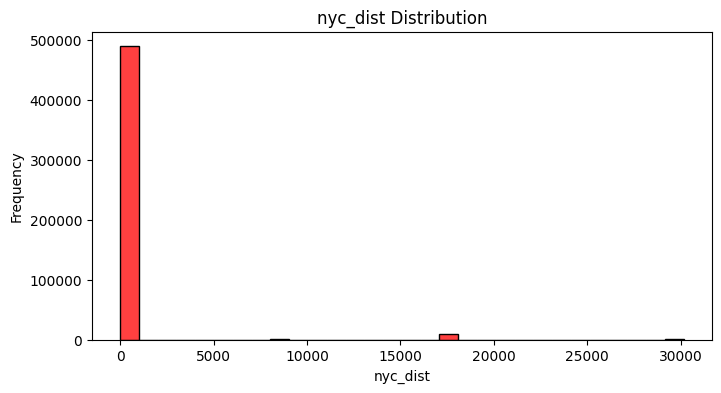

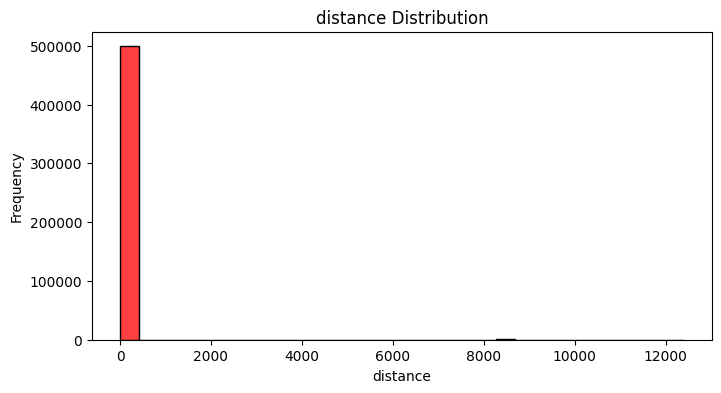

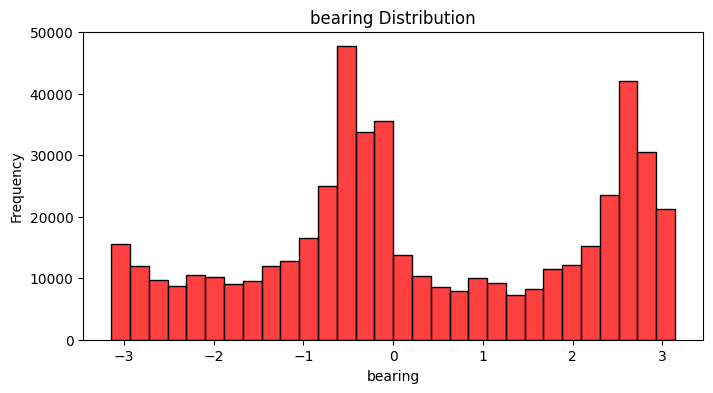

In [6]:
numerical_cols = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'weekday', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance', 'bearing']
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(data[col], bins=30, kde=False, color="red")
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [7]:
data.isnull().sum()

user_id              0
user_name            0
driver_name          0
car_condition        0
weather              0
traffic_condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [8]:
data.dropna(inplace=True) # very low number of missing fields with comparison with total number of records

In [9]:
data.isnull().sum()

user_id              0
user_name            0
driver_name          0
car_condition        0
weather              0
traffic_condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             0
ewr_dist             0
lga_dist             0
sol_dist             0
nyc_dist             0
distance             0
bearing              0
dtype: int64

In [10]:
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"], errors="coerce")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499995 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_id            499995 non-null  object        
 1   user_name          499995 non-null  object        
 2   driver_name        499995 non-null  object        
 3   car_condition      499995 non-null  object        
 4   weather            499995 non-null  object        
 5   traffic_condition  499995 non-null  object        
 6   key                499995 non-null  object        
 7   fare_amount        499995 non-null  float64       
 8   pickup_datetime    499995 non-null  datetime64[ns]
 9   pickup_longitude   499995 non-null  float64       
 10  pickup_latitude    499995 non-null  float64       
 11  dropoff_longitude  499995 non-null  float64       
 12  dropoff_latitude   499995 non-null  float64       
 13  passenger_count    499995 non-null  int64        

<Axes: xlabel='dropoff_latitude'>

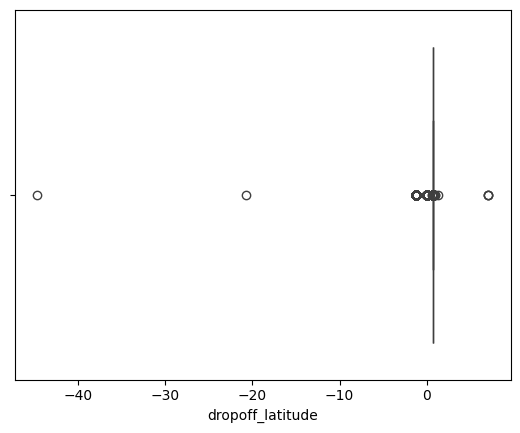

In [12]:
sns.boxplot(data = data, x = data['dropoff_latitude'])


<Axes: xlabel='distance'>

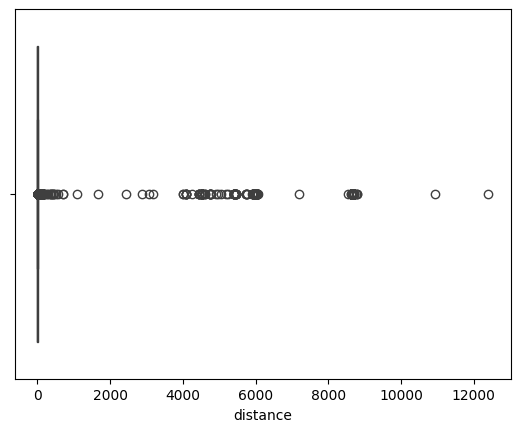

In [13]:
sns.boxplot(data = data, x = data['distance'])

<Axes: xlabel='bearing'>

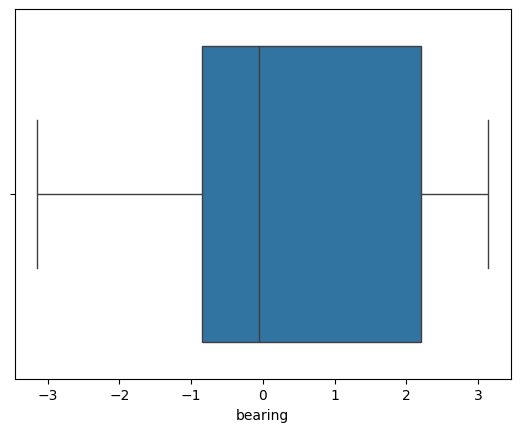

In [14]:
sns.boxplot(data = data, x = data['bearing'])

<Axes: xlabel='dropoff_longitude'>

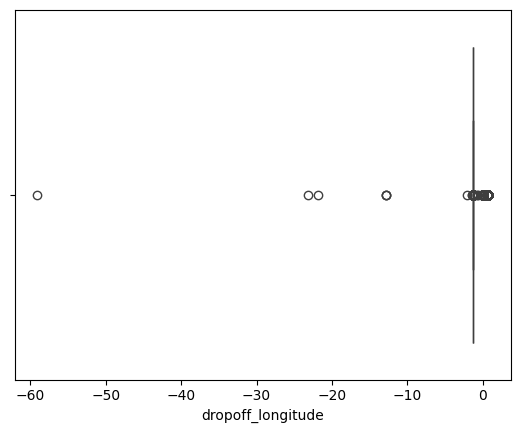

In [15]:
sns.boxplot(data = data, x = data['dropoff_longitude'])

<Axes: xlabel='ewr_dist'>

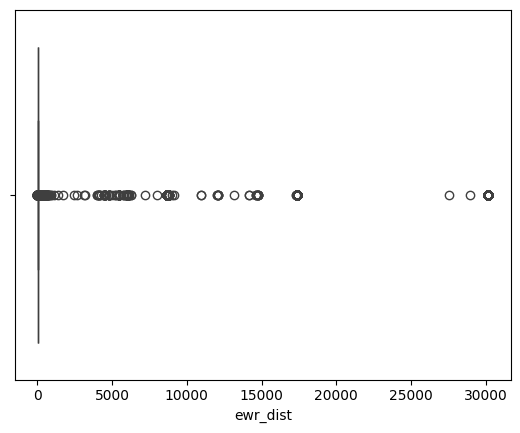

In [16]:
sns.boxplot(data = data, x = data['ewr_dist'])

<Axes: xlabel='fare_amount'>

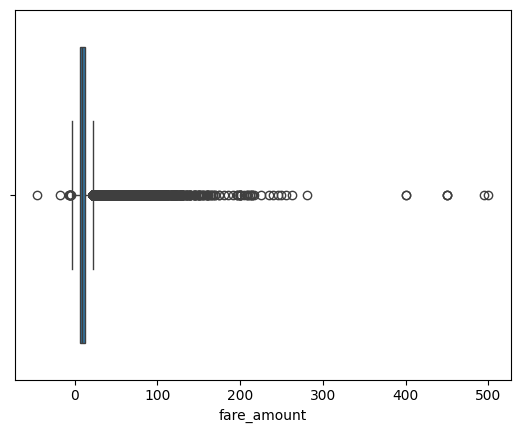

In [17]:
sns.boxplot(data = data, x = data['fare_amount'])

<Axes: xlabel='jfk_dist'>

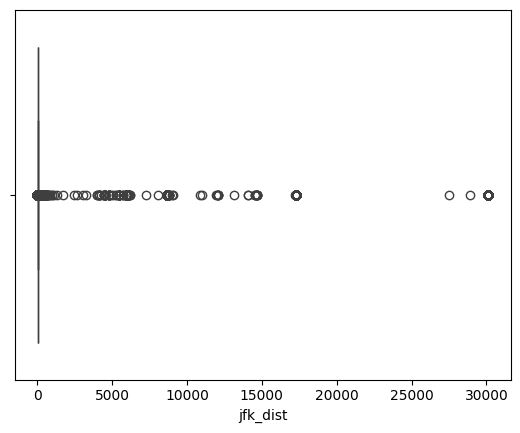

In [18]:
sns.boxplot(data = data, x = data['jfk_dist'])


<Axes: xlabel='lga_dist'>

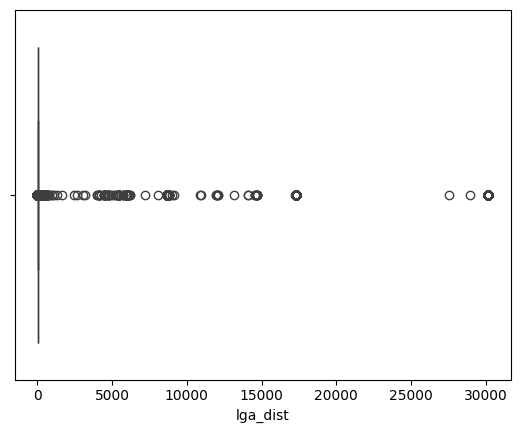

In [19]:
sns.boxplot(data = data, x = data['lga_dist'])


<Axes: xlabel='nyc_dist'>

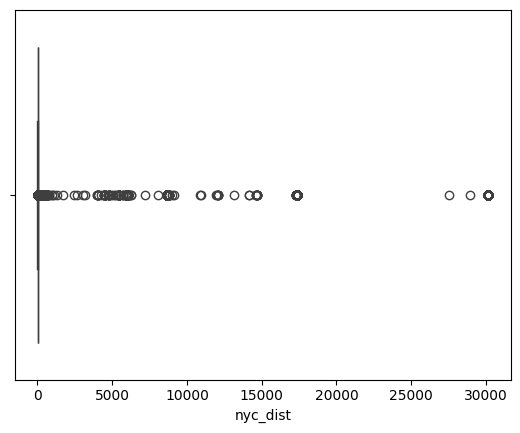

In [20]:
sns.boxplot(data = data, x = data['nyc_dist'])


<Axes: xlabel='passenger_count'>

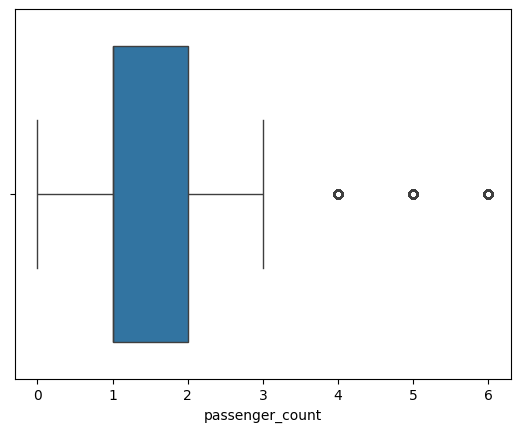

In [21]:
sns.boxplot(data = data, x = data['passenger_count'])


<Axes: xlabel='pickup_latitude'>

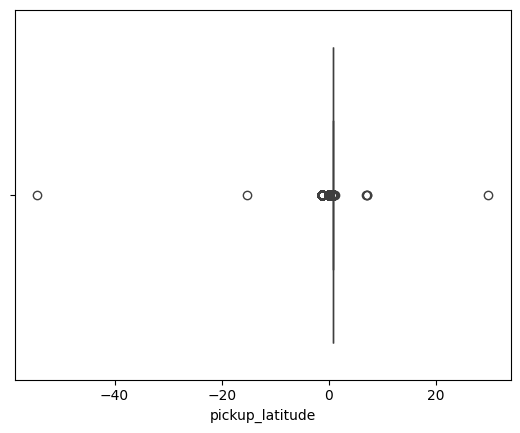

In [22]:
sns.boxplot(data = data, x = data['pickup_latitude'])


<Axes: xlabel='pickup_longitude'>

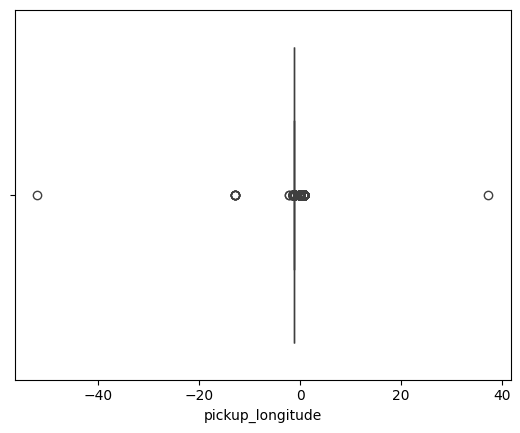

In [23]:
sns.boxplot(data = data, x = data['pickup_longitude'])


<Axes: xlabel='sol_dist'>

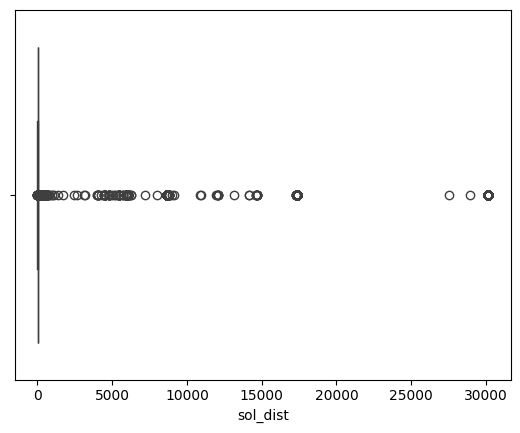

In [24]:
sns.boxplot(data = data, x = data['sol_dist'])


<Axes: xlabel='weekday'>

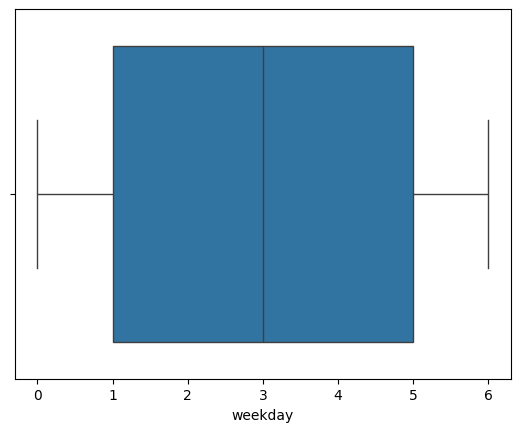

In [25]:
sns.boxplot(data = data, x = data['weekday'])

In [26]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]


outliers = {col: detect_outliers_iqr(data, col).shape[0] for col in numerical_cols}
print(outliers)

{'fare_amount': 43329, 'pickup_longitude': 33965, 'pickup_latitude': 23701, 'dropoff_longitude': 35805, 'dropoff_latitude': 30748, 'passenger_count': 56526, 'weekday': 0, 'jfk_dist': 59285, 'ewr_dist': 28380, 'lga_dist': 22539, 'sol_dist': 18610, 'nyc_dist': 21940, 'distance': 41925, 'bearing': 0}


In [27]:
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.clip(data[column], lower_bound, upper_bound)
    return data

numerical_cols.remove('passenger_count')
numerical_cols.remove('weekday')
numerical_cols.remove('bearing')
numerical_cols.remove('fare_amount')

data['fare_amount'] = np.log(data['fare_amount'])

for col in numerical_cols:
    cap_outliers_iqr(data, col)

numerical_cols.append('passenger_count')
numerical_cols.append('weekday')
numerical_cols.append('bearing')
numerical_cols.append('fare_amount')

outliers_after = {col: detect_outliers_iqr(data, col).shape[0] for col in numerical_cols}
print(outliers_after)

c:\Users\Abdullah\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Abdullah\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


{'pickup_longitude': 0, 'pickup_latitude': 0, 'dropoff_longitude': 0, 'dropoff_latitude': 0, 'jfk_dist': 0, 'ewr_dist': 0, 'lga_dist': 0, 'sol_dist': 0, 'nyc_dist': 0, 'distance': 0, 'passenger_count': 56526, 'weekday': 0, 'bearing': 0, 'fare_amount': 15742}


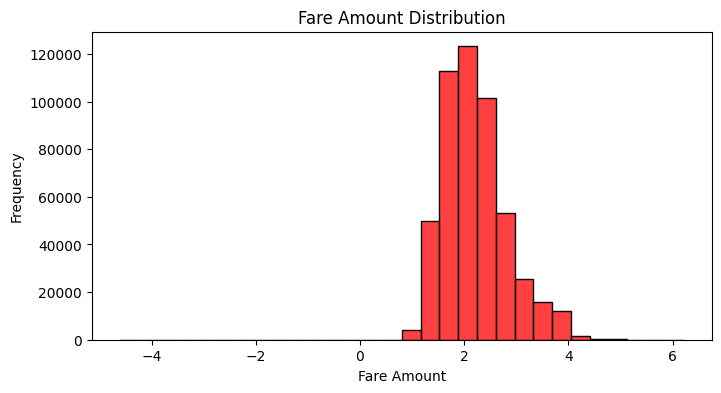

In [28]:
plt.figure(figsize=(8,4))
sns.histplot(data['fare_amount'], bins=30, kde=False, color="red")
plt.title("Fare Amount Distribution")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.show()

In [29]:
def robust_scale(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    median = data[column].median()
    data[column] = (data[column] - median) / IQR
    return data

numerical_cols.remove('passenger_count')
numerical_cols.remove('weekday')

for col in numerical_cols:
    data = robust_scale(data, col)

numerical_cols.append('passenger_count')
numerical_cols.append('weekday')

In [30]:
for col in categorical_cols:
    print(data[col].value_counts())

car_condition
Very Good    125310
Bad          124977
Good         124967
Excellent    124741
Name: count, dtype: int64
weather
sunny     100433
cloudy    100060
rainy      99971
stormy     99955
windy      99576
Name: count, dtype: int64
traffic_condition
Congested Traffic    166846
Dense Traffic        166581
Flow Traffic         166568
Name: count, dtype: int64
key
2010-04-12 23:46:58.0000002      1
2009-06-15 17:26:21.0000001      1
2010-01-05 16:52:16.0000002      1
2011-08-18 00:35:00.00000049     1
2012-04-21 04:30:42.0000001      1
                                ..
2013-11-23 12:57:00.000000190    1
2011-04-05 17:11:05.0000001      1
2013-07-02 19:54:00.000000232    1
2009-11-06 01:04:03.0000002      1
2012-12-24 11:24:00.00000098     1
Name: count, Length: 499995, dtype: int64
pickup_datetime
2012-01-26 21:22:00    6
2012-01-28 13:38:00    6
2010-11-10 22:25:00    5
2014-11-17 21:53:00    5
2014-01-30 20:47:00    5
                      ..
2015-05-07 18:45:12    1
2010-09-13 

In [31]:
import category_encoders as ce

car_conditions = ['Excellent', 'Very Good', 'Good', 'Bad']
traffic_conditions = ['Flow Traffic', 'Dense Traffic', 'Congested Traffic']
weather_conditions = ['sunny', 'windy', 'cloudy', 'rainy', 'stormy']

ordinal_encoder = ce.OrdinalEncoder(mapping=[{'col': 'car_condition', 'mapping': {level: index for index, level in enumerate(car_conditions)}}])

data_encoded = ordinal_encoder.fit_transform(data)

ordinal_encoder2 = ce.OrdinalEncoder(mapping=[{'col': 'traffic_condition', 'mapping': {level: index for index, level in enumerate(traffic_conditions)}}])

data_encoded = ordinal_encoder2.fit_transform(data_encoded)

ordinal_encoder3 = ce.OrdinalEncoder(mapping=[{'col': 'weather', 'mapping': {level: index for index, level in enumerate(weather_conditions)}}])

data_encoded = ordinal_encoder3.fit_transform(data_encoded)


In [32]:
data_encoded.head()

,user_id,user_name,driver_name,car_condition,weather,traffic_condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,1,1,2,2009-06-15 17:26:21.0000001,-0.866506,2009-06-15 17:26:21,2.088356,...,6,0,2009,-1.983463,2.073661,-1.026376,2.040476,2.046552,-0.405980,-0.936947
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,0,2,0,2010-01-05 16:52:16.0000002,0.936344,2010-01-05 16:52:16,-1.374341,...,1,1,2010,0.877413,-0.482018,0.692058,-0.427803,-0.233166,2.162712,-0.106084
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,3,4,2,2011-08-18 00:35:00.00000049,-0.544437,2011-08-18 00:35:00,-0.038226,...,8,3,2011,0.439633,-0.175414,0.053526,-0.082986,-0.083657,-0.271889,0.865723
3,9I7kWFgd,Steven Wilson,Amy Horn,1,4,0,2012-04-21 04:30:42.0000001,-0.134673,2012-04-21 04:30:42,-0.214396,...,4,5,2012,0.049016,-0.363936,0.287752,-0.346392,-0.377292,0.255016,0.060215
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,3,4,2,2010-03-09 07:51:00.000000135,-0.643568,2010-03-09 07:51:00,0.549127,...,3,1,2010,0.330092,0.753463,-0.854941,0.715038,0.704338,-0.044034,-0.147726


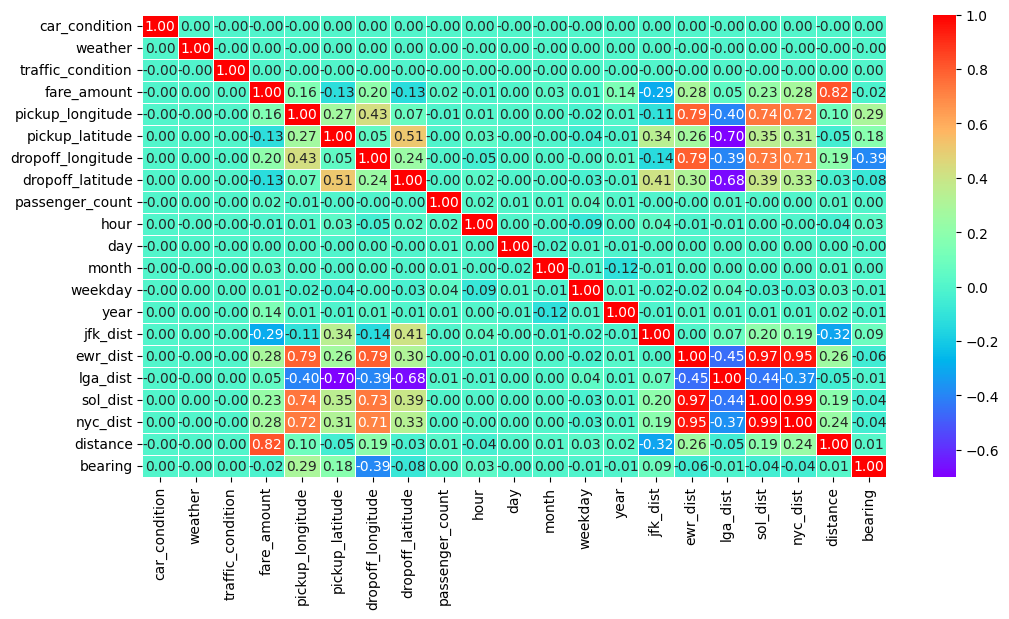

In [33]:
plt.figure(figsize=(12,6))

sns.heatmap(data_encoded.select_dtypes(include=["int64", "float64"]).corr(), annot=True, cmap="rainbow", fmt=".2f", linewidths=0.5)
plt.show()

In [34]:
data_encoded = data_encoded.drop(columns=['jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist']) #very high correlation between each other

In [35]:
data_encoded.head()

,user_id,user_name,driver_name,car_condition,weather,traffic_condition,key,fare_amount,pickup_datetime,pickup_longitude,...,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,1,1,2,2009-06-15 17:26:21.0000001,-0.866506,2009-06-15 17:26:21,2.088356,...,2.095254,-1.199425,1,17,15,6,0,2009,-0.405980,-0.936947
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,0,2,0,2010-01-05 16:52:16.0000002,0.936344,2010-01-05 16:52:16,-1.374341,...,0.030852,0.846646,1,16,5,1,1,2010,2.162712,-0.106084
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,3,4,2,2011-08-18 00:35:00.00000049,-0.544437,2011-08-18 00:35:00,-0.038226,...,-0.399712,-0.076002,2,0,18,8,3,2011,-0.271889,0.865723
3,9I7kWFgd,Steven Wilson,Amy Horn,1,4,0,2012-04-21 04:30:42.0000001,-0.134673,2012-04-21 04:30:42,-0.214396,...,-0.411399,0.144962,1,4,21,4,5,2012,0.255016,0.060215
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,3,4,2,2010-03-09 07:51:00.000000135,-0.643568,2010-03-09 07:51:00,0.549127,...,0.843977,0.898233,1,7,9,3,1,2010,-0.044034,-0.147726


In [36]:
data_encoded.isnull().sum()

data_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)

In [37]:
data_encoded.dropna(subset=['fare_amount'], inplace=True)

data_encoded.isnull().sum()

user_id              0
user_name            0
driver_name          0
car_condition        0
weather              0
traffic_condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
distance             0
bearing              0
dtype: int64

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
X_numeric = data_encoded.select_dtypes(include=["int64", "float64"])

vif_data = pd.DataFrame()
vif_data["Feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(len(X_numeric.columns))]

vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
13,year,22.173189
9,hour,5.379521
11,month,4.331272
10,day,4.265565
14,distance,3.513155
12,weekday,3.478927
3,fare_amount,3.312404
1,weather,2.995697
0,car_condition,2.802549
8,passenger_count,2.664144


In [40]:
data_encoded.drop(columns=['year'])

,user_id,user_name,driver_name,car_condition,weather,traffic_condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,1,1,2,2009-06-15 17:26:21.0000001,-0.866506,2009-06-15 17:26:21,2.088356,-0.974860,2.095254,-1.199425,1,17,15,6,0,-0.405980,-0.936947
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,0,2,0,2010-01-05 16:52:16.0000002,0.936344,2010-01-05 16:52:16,-1.374341,-1.286307,0.030852,0.846646,1,16,5,1,1,2.162712,-0.106084
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,3,4,2,2011-08-18 00:35:00.00000049,-0.544437,2011-08-18 00:35:00,-0.038226,0.267417,-0.399712,-0.076002,2,0,18,8,3,-0.271889,0.865723
3,9I7kWFgd,Steven Wilson,Amy Horn,1,4,0,2012-04-21 04:30:42.0000001,-0.134673,2012-04-21 04:30:42,-0.214396,-0.607192,-0.411399,0.144962,1,4,21,4,5,0.255016,0.060215
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,3,4,2,2010-03-09 07:51:00.000000135,-0.643568,2010-03-09 07:51:00,0.549127,0.476935,0.843977,0.898233,1,7,9,3,1,-0.044034,-0.147726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,er7Luy6J,Morgan Smith,Gabriel Coleman,3,3,1,2015-05-07 18:45:12.0000004,-0.264529,2015-05-07 18:45:12,0.120735,0.436998,0.505355,0.158028,1,18,7,5,3,-0.266214,-0.726856
499996,FWDZu9NA,Dillon Jackson,Larry Richards,1,3,0,2010-09-13 12:11:34.0000004,0.650340,2010-09-13 12:11:34,-0.848238,-1.065377,-1.054153,-1.238336,1,12,13,9,0,-0.419652,0.851668
499997,QZIMcpLZ,Michael Rodriguez,Lonnie Santana,3,3,0,2014-08-25 00:22:20.0000001,1.469830,2014-08-25 00:22:20,-0.084234,-0.841400,2.095254,-1.530958,1,0,25,8,0,2.146257,-0.612711
499998,AD72Uwmn,Deborah Soto,Emily Rivera,2,4,2,2015-01-12 12:17:32.0000001,-0.365498,2015-01-12 12:17:32,0.287519,0.119457,0.357486,0.341834,6,12,12,1,0,-0.419545,-0.109220


Model

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = data_encoded.drop(columns=['fare_amount', 'user_id', 'user_name', 'driver_name', 'key', 'pickup_datetime'])
y = data_encoded['fare_amount']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics


X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mae)
print("\n")
print(mse)
print("\n")
print(r2)



0.25627695174540843


0.15856230504818775


0.7659701727547975
